## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №4. Градиентный бустинг ~~своими руками~~

Задание выполнил(а): Ханаев Антон

### Общая информация
__Дата выдачи:__ 27.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_04_Фамилия_Имя.ipynb

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [2]:
import os
import numpy as np
import pandas as pd

In [2]:
os.listdir('./data')

['installments_payments.csv',
 'HomeCredit_columns_description.csv',
 'to_vadim_with_love=*.7z',
 'application_train.csv',
 'sample_submission.csv',
 'bureau.csv',
 'previous_application.csv',
 'credit_card_balance.csv',
 'application_test.csv',
 'bureau_balance.csv',
 'POS_CASH_balance.csv']

In [98]:
data = pd.read_csv('./data/application_train.csv', index_col='SK_ID_CURR')

In [4]:
data.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.shape

(307511, 121)

In [99]:
Y = data['TARGET']
data.drop(['TARGET'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 283.9+ MB


In [8]:
data.columns[data.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [9]:
data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
description = pd.read_csv('./data/HomeCredit_columns_description.csv', encoding = 'unicode_escape')

In [11]:
description.shape

(219, 5)

In [12]:
row_with_descr = description[description['Table'] == 'application_{train|test}.csv'][['Row', 'Description']]
row_with_descr.values

array([['SK_ID_CURR', 'ID of loan in our sample'],
       ['TARGET',
        'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'],
       ['NAME_CONTRACT_TYPE',
        'Identification if loan is cash or revolving'],
       ['CODE_GENDER', 'Gender of the client'],
       ['FLAG_OWN_CAR', 'Flag if the client owns a car'],
       ['FLAG_OWN_REALTY', 'Flag if client owns a house or flat'],
       ['CNT_CHILDREN', 'Number of children the client has'],
       ['AMT_INCOME_TOTAL', 'Income of the client'],
       ['AMT_CREDIT', 'Credit amount of the loan'],
       ['AMT_ANNUITY', 'Loan annuity'],
       ['AMT_GOODS_PRICE',
        'For consumer loans it is the price of the goods for which the loan is given'],
       ['NAME_TYPE_SUITE',
        'Who was accompanying client when he was applying for the loan'],
       ['NAME_INCOME_TYPE',
        'Clients inco

#### Последние колонки либо почти всегда константные, либо непонятно их описание, уберу их.

In [5]:
data.drop(data.columns[110:], axis=1, inplace=True)
data.shape

(307511, 110)

#### Категориальные признаки со стринговыми значениями

In [6]:
object_cols = data.describe(include=['object']).columns
object_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [7]:
data[object_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
100004,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
100007,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [8]:
data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,...,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,...,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
add = data.describe().iloc[:, 60:73].columns

In [10]:
numerical = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
             'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
             'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
             'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
             'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
             'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
             'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
             'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 
             'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
             'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
             'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
             'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
             'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
             'DAYS_LAST_PHONE_CHANGE']

In [11]:
numerical = np.concatenate((numerical, add.values))

#### Признаки, принимающие вещественные значения

In [12]:
numerical

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MED

#### Категориальные числовые вместе со стринговыми

In [13]:
categorical = data.columns[~data.columns.isin(numerical)]
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7

#### Делим выборку на обучающую и тестовую

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=0)

#### Заполним пропуски в данных

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cont_imputer = SimpleImputer(strategy='mean')

train_cat_imputed = cat_imputer.fit_transform(X_train[categorical])
test_cat_imputed = cat_imputer.transform(X_test[categorical])

train_cont_imputed = cont_imputer.fit_transform(X_train[numerical])
test_cont_imputed = cont_imputer.transform(X_test[numerical])

#### Нормировка вещественных признаков и one-hot кодирование категориальных

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [19]:
ohe = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()

train_cat_encoded = ohe.fit_transform(train_cat_imputed)
test_cat_encoded = ohe.transform(test_cat_imputed)

train_cont_scaled = std_scaler.fit_transform(train_cont_imputed)
test_cont_scaled = std_scaler.transform(test_cont_imputed)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [20]:
import lightgbm
from sklearn.metrics import average_precision_score

In [29]:
%%time
lgb = lightgbm.LGBMClassifier(random_state=0)
lgb.fit(train_cont_scaled, y_train)
preds = lgb.predict_proba(test_cont_scaled)
print(average_precision_score(y_test, preds[:, 1]))

0.2245578167160446
CPU times: user 16.1 s, sys: 75.8 ms, total: 16.2 s
Wall time: 4.18 s


In [21]:
import catboost

In [31]:
%%time
ctb = catboost.CatBoostClassifier(random_seed=0, silent=True)
ctb.fit(train_cont_scaled, y_train)
preds = ctb.predict_proba(test_cont_scaled)
print(average_precision_score(y_test, preds[:, 1]))

0.22817533263018488
CPU times: user 5min 30s, sys: 7.76 s, total: 5min 38s
Wall time: 1min 30s


#### Качество получилось немного лучше у catboost'a, так как он является менее чувствительным к подбору гиперпараметров, чем lightgbm, который к тому же и делает разбиение не по значениям признаков, а по их гистограмам.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [23]:
lgb = lightgbm.LGBMClassifier(random_state=0)
ctb = catboost.CatBoostClassifier(random_seed=0, silent=True)

data = np.concatenate((train_cont_scaled, test_cont_scaled))
target = np.concatenate((y_train, y_test))

scorer = make_scorer(average_precision_score, needs_proba=True)

In [93]:
lgb_params = {'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 400],
              'learning_rate': [0.01, 0.1, 0.3],
              'objective': ['binary', 'cross_entropy']}

lgb_gs = GridSearchCV(lgb, lgb_params, scoring=scorer, cv=3)

In [94]:
%%time
lgb_gs.fit(data, target)

CPU times: user 1h 30min 2s, sys: 30.2 s, total: 1h 30min 32s
Wall time: 23min 28s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 400], 'learning_rate': [0.01, 0.1, 0.3], 'objective': ['binary', 'cross_entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [95]:
lgb_gs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [96]:
lgb_gs.best_score_

0.23259026150295653

In [97]:
lgb_params = {'max_depth': [3],
              'n_estimators': [400, 700, 1000],
              'learning_rate': [0.1],
              'objective': ['binary']}

lgb_gs = GridSearchCV(lgb, lgb_params, scoring=scorer, cv=3)

In [98]:
%%time
lgb_gs.fit(data, target)

CPU times: user 10min 52s, sys: 1.73 s, total: 10min 54s
Wall time: 2min 46s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3], 'n_estimators': [400, 700, 1000], 'learning_rate': [0.1], 'objective': ['binary']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [99]:
lgb_gs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=700, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [100]:
lgb_gs.best_score_

0.2327022614262429

In [101]:
ctb_params = {'depth': [3, 4, 5],
              'num_trees': [100, 200, 400],
              'learning_rate': [0.01, 0.1],
              'loss_function': ['Logloss', 'CrossEntropy']}

ctb_gs = GridSearchCV(ctb, ctb_params, scoring=scorer, cv=3)

In [102]:
%%time
ctb_gs.fit(data, target)

CPU times: user 2h 14min 10s, sys: 3min 14s, total: 2h 17min 25s
Wall time: 48min 20s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostClassifier object at 0x7fd1217372b0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [3, 4, 5], 'num_trees': [100, 200, 400], 'learning_rate': [0.01, 0.1], 'loss_function': ['Logloss', 'CrossEntropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [104]:
ctb_gs.best_estimator_.get_params()

{'loss_function': 'Logloss',
 'random_seed': 0,
 'silent': True,
 'depth': 5,
 'learning_rate': 0.1,
 'num_trees': 400}

In [105]:
ctb_gs.best_score_

0.23222946064425387

In [107]:
ctb_params = {'depth': [5],
              'num_trees': [400, 700, 1000],
              'learning_rate': [0.1],
              'loss_function': ['Logloss']}

ctb_gs = GridSearchCV(ctb, ctb_params, scoring=scorer, cv=3)

In [108]:
%%time
ctb_gs.fit(data, target)

CPU times: user 32min 26s, sys: 48.8 s, total: 33min 15s
Wall time: 2h 52min 35s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostClassifier object at 0x7fd1217372b0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [5], 'num_trees': [400, 700, 1000], 'learning_rate': [0.1], 'loss_function': ['Logloss']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [109]:
ctb_gs.best_estimator_.get_params()

{'loss_function': 'Logloss',
 'random_seed': 0,
 'silent': True,
 'depth': 5,
 'learning_rate': 0.1,
 'num_trees': 400}

In [110]:
ctb_gs.best_score_

0.23222946064425387

#### Присутствует следующая тенденция: lightgbm строит большее количество деревьев, чем catboost. Однако у реализации градиентного бустинга от Яндекса деревья получаются глубже, чем у lightgbm'a.

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [24]:
train_cont_scaled.shape

(215257, 59)

In [25]:
train_cat_encoded.shape

(215257, 294)

In [26]:
from scipy.sparse import hstack
from scipy.sparse import vstack

In [27]:
train = hstack((train_cont_scaled, train_cat_encoded))
train

<215257x353 sparse matrix of type '<class 'numpy.float64'>'
	with 21462701 stored elements in COOrdinate format>

In [28]:
test = hstack((test_cont_scaled, test_cat_encoded))
test

<92254x353 sparse matrix of type '<class 'numpy.float64'>'
	with 9201185 stored elements in COOrdinate format>

In [29]:
data = vstack((train, test))
data

<307511x353 sparse matrix of type '<class 'numpy.float64'>'
	with 30663886 stored elements in COOrdinate format>

#### One-Hot Encoded признаки

In [41]:
lgb = lightgbm.LGBMClassifier(random_state=0, learning_rate=0.1)

In [42]:
lgb_params = {'max_depth': [3, 5],
              'n_estimators': [200, 400, 700, 1000]}

lgb_gs = GridSearchCV(lgb, lgb_params, scoring=scorer, cv=3)

In [43]:
%%time
lgb_gs.fit(train, y_train)

CPU times: user 28min 46s, sys: 3.2 s, total: 28min 49s
Wall time: 7min 33s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5], 'n_estimators': [200, 400, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [44]:
lgb_gs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [84]:
lgb_gs.best_score_

0.24194282116153823

In [46]:
ctb = catboost.CatBoostClassifier(random_seed=0, silent=True, learning_rate=0.1)

In [47]:
ctb_params = {'depth': [3, 5],
              'num_trees': [200, 400, 700]}

ctb_gs = GridSearchCV(ctb, ctb_params, scoring=scorer, cv=3)

In [48]:
%%time
ctb_gs.fit(train.toarray(), y_train)

CPU times: user 39min 10s, sys: 57.7 s, total: 40min 8s
Wall time: 15min 1s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostClassifier object at 0x7fec1acedcf8>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [3, 5], 'num_trees': [200, 400, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [91]:
ctb_gs.best_estimator_.get_params()

{'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'random_seed': 0,
 'silent': True,
 'depth': 3,
 'num_trees': 700}

In [93]:
ctb_gs.best_score_

0.24072578200619968

In [188]:
def calc_smooth_mean(b, y, m):
    
    b_s = pd.Series(b, name='col')
    y_s = pd.Series(y, name='targ')
    df = pd.concat((b_s, y_s), axis=1)
    
    mean = df['targ'].mean()
    agg = df.groupby('col')['targ'].agg(['count', 'mean'])
    
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + m * mean) / (counts + m)

    return df['col'].map(smooth).values

#### Smoothed Mean-Target encoding

In [32]:
import category_encoders as ce

In [33]:
target_encoder = ce.target_encoder.TargetEncoder(cols=np.arange(51), smoothing=2, return_df=False)

train_target = target_encoder.fit_transform(train_cat_imputed, y_train)
test_target = target_encoder.transform(test_cat_imputed)

In [34]:
new_train = np.concatenate((train_cont_scaled, train_target), axis=1)
new_test = np.concatenate((test_cont_scaled, test_target), axis=1)

In [218]:
lgb_2 = lightgbm.LGBMClassifier(random_state=0, learning_rate=0.1)

In [219]:
lgb_params = {'max_depth': [3, 4],
              'n_estimators': [600, 700, 800]}

lgb_gs_2 = GridSearchCV(lgb_2, lgb_params, scoring=scorer, cv=3)

In [220]:
%%time
lgb_gs_2.fit(new_train, y_train)

CPU times: user 22min 48s, sys: 3.64 s, total: 22min 52s
Wall time: 6min 11s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4], 'n_estimators': [600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [221]:
lgb_gs_2.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=600, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [222]:
lgb_gs_2.best_score_

0.23996874738351673

In [226]:
average_precision_score(y_test, lgb_gs_2.best_estimator_.predict_proba(new_test)[:, 1])

0.23823243274445627

In [227]:
ctb_params = {'depth': [3, 4],
              'num_trees': [500, 700, 1000]}

ctb_gs_2 = GridSearchCV(ctb, ctb_params, scoring=scorer, cv=3)

In [228]:
%%time
ctb_gs_2.fit(new_train, y_train)

CPU times: user 52min 12s, sys: 1min 28s, total: 53min 40s
Wall time: 15min 55s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostClassifier object at 0x7f7f49cc89e8>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [3, 4], 'num_trees': [500, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [230]:
ctb_gs_2.best_estimator_.get_params()

{'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'random_seed': 0,
 'silent': True,
 'depth': 3,
 'num_trees': 1000}

In [231]:
ctb_gs_2.best_score_

0.24055595513917116

In [232]:
average_precision_score(y_test, ctb_gs_2.best_estimator_.predict_proba(new_test)[:, 1])

0.23754768615949076

#### Время, необходимое для построения моделей, заметно различается в зависимости от выбора кодирования категориальных признаков. При использовании One-Hot encoding'a появляется больше признаков для обучения, поэтому модели обучаются дольше, чем при использовании Mean-Target кодирования, который оставляет количество признаков неизменным.

In [234]:
train_cont_scaled.shape

(215257, 59)

In [237]:
new_train.shape

(215257, 110)

In [240]:
np.arange(59, 110)

array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [236]:
lgb = lightgbm.LGBMClassifier(random_state=0, learning_rate=0.1)

In [249]:
lgb_params = {'max_depth': [3, 4],
              'n_estimators': [500, 600, 700]}

lgb_gs_3 = GridSearchCV(lgb, lgb_params, scoring=scorer, cv=3)

In [250]:
train_df = pd.DataFrame(new_train)
train_df.columns[-1]

109

In [251]:
%%time
lgb_gs_3.fit(train_df, y_train, **{'categorical_feature':list(range(59, 110))})

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/lightgbm/basic.py:1190: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


CPU times: user 13min 45s, sys: 10 s, total: 13min 56s
Wall time: 3min 36s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4], 'n_estimators': [500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [252]:
lgb_gs_3.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=3,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [253]:
lgb_gs_3.best_score_

0.2334053187592689

In [35]:
ctb_params = {'depth': [3, 4],
              'num_trees': [600, 700, 800]}

ctb_gs_3 = GridSearchCV(ctb, ctb_params, scoring=scorer, cv=3)

In [36]:
%%time
ctb_gs_3.fit(train.toarray(), y_train, **{'cat_features':list(range(59, 110))})

CPU times: user 55min 35s, sys: 1min 19s, total: 56min 55s
Wall time: 19min 46s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=<catboost.core.CatBoostClassifier object at 0x7fec115f38d0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'depth': [3, 4], 'num_trees': [600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(average_precision_score, needs_proba=True),
       verbose=0)

In [38]:
ctb_gs_3.best_estimator_.get_params()

{'learning_rate': 0.1,
 'loss_function': 'Logloss',
 'random_seed': 0,
 'silent': True,
 'depth': 3,
 'num_trees': 800}

In [39]:
ctb_gs_3.best_score_

0.24140621923382577

#### Модели, обученные на встроенных методах библиотек Lightgbm и CatBoost для эффективной обработки категориальных признаков, имеют качество лучше, чем модели, обученные только на данных, без указания категориальных признаков.

__Задание 5. (1 балл)__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) подобранных в предыдущем задании моделей и сравните качество.

In [49]:
voting_clf = VotingClassifier(estimators=[
    ('lgb_1', lgb_gs.best_estimator_),
    ('ctb_1', ctb_gs.best_estimator_),
    ('ctb_2', ctb_gs_3.best_estimator_)
])

In [56]:
inp_1 = lgb_gs.best_estimator_.predict_proba(train.toarray())[:, 1]
inp_2 = ctb_gs.best_estimator_.predict_proba(train.toarray())[:, 1]
inp_3 = ctb_gs_3.best_estimator_.predict_proba(train.toarray())[:, 1]

In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
data = np.vstack((inp_1, inp_2, inp_3))

In [62]:
clf = LogisticRegression(random_state=0)

In [67]:
clf.fit(data.T, y_train)

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
inp_1_t = lgb_gs.best_estimator_.predict_proba(test.toarray())[:, 1]
inp_2_t = ctb_gs.best_estimator_.predict_proba(test.toarray())[:, 1]
inp_3_t = ctb_gs_3.best_estimator_.predict_proba(test.toarray())[:, 1]

In [69]:
data = np.vstack((inp_1, inp_2, inp_3)).T

In [70]:
preds = clf.predict_proba(data)[:, 1]
average_precision_score(y_train, preds)

0.2854698413761158

#### Как видно из оценки качества выше, блэндинг моделей существенно увеличивает обобщающую способность модели (был достигнут прирост в ~25%). Это означает, что корреляция между моделями достаточно мала, чтобы был значительный прирост метрики.

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
feature_imp = pd.DataFrame(sorted(zip(lgb_gs.best_estimator_.feature_importances_,np.hstack((numerical, categorical)))), columns=['Value','Feature'])

In [93]:
to_plot_lgb = feature_imp.sort_values(by="Value", ascending=False)[:50]

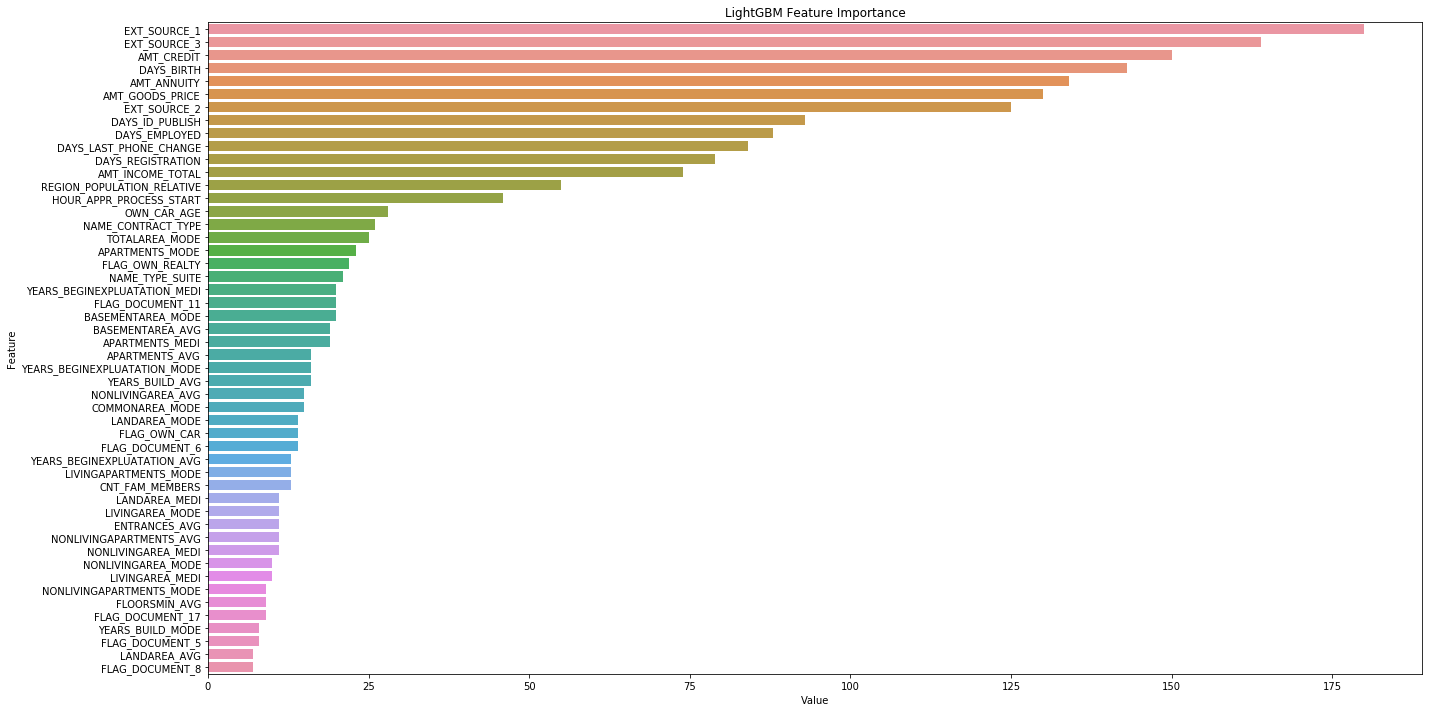

In [94]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=to_plot_lgb)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

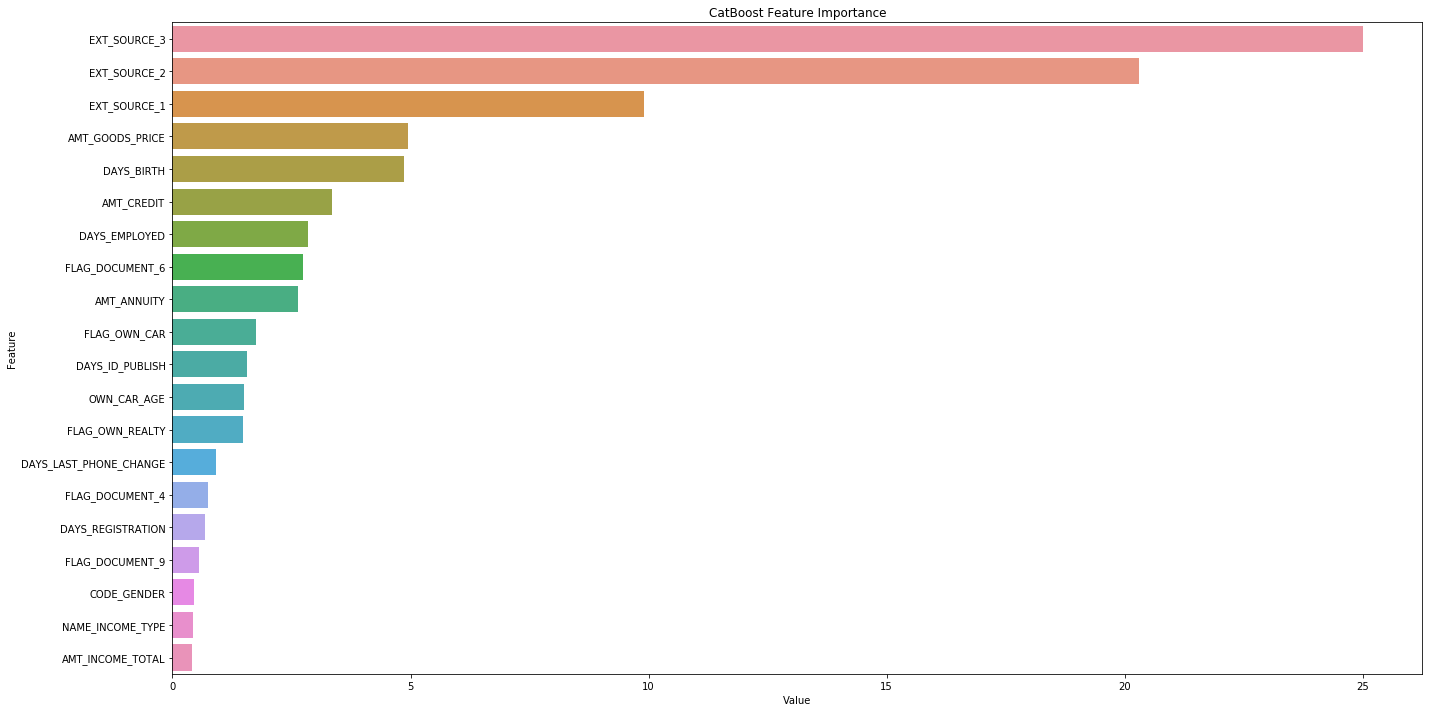

In [95]:
feature_imp = pd.DataFrame(sorted(zip(ctb_gs.best_estimator_.feature_importances_,np.hstack((numerical, categorical)))), columns=['Value','Feature'])
to_plot = feature_imp.sort_values(by="Value", ascending=False)[:20]
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=to_plot)
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()

In [110]:
data[to_plot_lgb['Feature'][:20]]

,EXT_SOURCE_1,EXT_SOURCE_3,AMT_CREDIT,DAYS_BIRTH,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,OWN_CAR_AGE,NAME_CONTRACT_TYPE,TOTALAREA_MODE,APARTMENTS_MODE,FLAG_OWN_REALTY,NAME_TYPE_SUITE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100002,0.083037,0.139376,406597.5,-9461,24700.5,351000.0,0.262949,-2120,-637,-1134.0,-3648.0,202500.000,0.018801,10,NaN,Cash loans,0.0149,0.0252,Y,Unaccompanied
100003,0.311267,NaN,1293502.5,-16765,35698.5,1129500.0,0.622246,-291,-1188,-828.0,-1186.0,270000.000,0.003541,11,NaN,Cash loans,0.0714,0.0924,N,Family
100004,NaN,0.729567,135000.0,-19046,6750.0,135000.0,0.555912,-2531,-225,-815.0,-4260.0,67500.000,0.010032,9,26.0,Revolving loans,NaN,NaN,Y,Unaccompanied
100006,NaN,NaN,312682.5,-19005,29686.5,297000.0,0.650442,-2437,-3039,-617.0,-9833.0,135000.000,0.008019,17,NaN,Cash loans,NaN,NaN,Y,Unaccompanied
100007,NaN,NaN,513000.0,-19932,21865.5,513000.0,0.322738,-3458,-3038,-1106.0,-4311.0,121500.000,0.028663,11,NaN,Cash loans,NaN,NaN,Y,Unaccompanied
100008,NaN,0.621226,490495.5,-16941,27517.5,454500.0,0.354225,-477,-1588,-2536.0,-4970.0,99000.000,0.035792,16,NaN,Cash loans,NaN,NaN,Y,"Spouse, partner"
100009,0.774761,0.492060,1560726.0,-13778,41301.0,1395000.0,0.724000,-619,-3130,-1562.0,-1213.0,171000.000,0.035792,16,17.0,Cash loans,NaN,NaN,Y,Unaccompanied
100010,NaN,0.540654,1530000.0,-18850,42075.0,1530000.0,0.714279,-2379,-449,-1070.0,-4597.0,360000.000,0.003122,16,8.0,Cash loans,NaN,NaN,Y,Unaccompanied
100011,0.587334,0.751724,1019610.0,-20099,33826.5,913500.0,0.205747,-3514,365243,0.0,-7427.0,112500.000,0.018634,14,NaN,Cash loans,NaN,NaN,Y,Children


In [111]:
cat = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE']

In [123]:
num = to_plot_lgb['Feature'][:20][~to_plot_lgb['Feature'][:20].isin(cat)].values

In [120]:
cat_imp = SimpleImputer(strategy='most_frequent')
num_imp = SimpleImputer(strategy='mean')

In [121]:
train, test = train_test_split(data, test_size=0.3, random_state=0)

In [124]:
train_cat = cat_imp.fit_transform(train[cat])
train_num = num_imp.fit_transform(train[num])

test_cat = cat_imp.transform(test[cat])
test_num = num_imp.transform(test[num])

In [128]:
ohe = OneHotEncoder(handle_unknown='ignore')
std = StandardScaler()

In [129]:
train_cat = ohe.fit_transform(train_cat)
train_num = std.fit_transform(train_num)

test_cat = ohe.transform(test_cat)
test_num = std.transform(test_num)

In [131]:
train = hstack((train_cat, train_num))
test = hstack((test_cat, test_num))

In [135]:
lgb.fit(train, y_train)
average_precision_score(y_test, lgb.predict_proba(test)[:, 1])

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/lightgbm/basic.py:469: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


0.22755075680357686

In [138]:
ctb.fit(train.toarray(), y_train)
average_precision_score(y_test, ctb.predict_proba(test.toarray())[:, 1])

0.22817617934032375

#### Качество упало незаметно по отношению к тому количеству данных, которое было убрано из первоначальной выборки, так как малозначащие признаки редко используются моделями для построений разбиений деревьев.

__Задание 7. (0.001 балла)__

Приложите ссылку на любимое короткое видео на YouTube, чтобы поднять проверяющему настроение.

https://vk.com/video?q=taylor%20swift%20troubles&z=video20146525_171448601
Не ютуб, но оно того стоит.